In [55]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [56]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [57]:
annotation_round = 1

##### Define output directory

In [58]:
from utils import *
directories_file = './directories.json'

In [59]:
accession_analysis_dir = get_mutant_analysis_path(directories_file, 'accession', annotation_round)

##### Import analysis functions

In [60]:
# Import project path to allow for relative imports
import project_path

In [61]:
from mutant_analysis_accession import *
from mutant_analysis_family import obtain_chembl_family,group_families
from mutant_analysis_organism import annotate_organism_taxonomy

#### Calculate statistics per protein accession

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the variant statistics table some cells below to see if some of the variants are undefined.

In [62]:
stats_protein = get_statistics_across_accessions(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                                 annotation_round, accession_analysis_dir, save=False)
stats_protein

,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
0,A0A045ISB3,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN
1,A2RI47,23,17.0,7,26.086957,Other,Other,Other,Other,Other,Lactococcus lactis subsp. cremoris (strain MG1...,NaN
2,A3EZI9,794,673.0,7,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family,Hepacivirus C,NaN
3,A3EZJ3,783,746.0,17,4.725415,Other,Other,Other,Other,Other,Hepacivirus C,NaN
4,A4HSF7,50,49.0,2,2.000000,Enzyme,Other,Other,Other,Other,Leishmania infantum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
333,Q9WKE8,111,0.0,6,100.000000,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN
334,Q9Y233,4336,4168.0,3,3.874539,Enzyme,Phosphodiesterase,Phosphodiesterase 10,Phosphodiesterase 10A,Other,Homo sapiens (Human),PDE10A
335,Q9Y243,418,408.0,2,2.392344,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,AGC protein kinase AKT family,Homo sapiens (Human),AKT3
336,Q9Y2R2,279,272.0,8,2.508961,Enzyme,Phosphatase,Protein Phosphatase,Tyrosine protein phosphatase,Other,Homo sapiens (Human),PTPN22


Check which proteins satisfy certain criteria, for example to mention in the manuscript:

In [63]:
filter_statistics(stats_protein,
                  min_data=1000,
                  max_data=None,
                  min_percentage=10,
                  max_perccentage=None,
                  min_variants=0,
                  max_variants=None,
                  sort_output_by='connectivity')

Accession codes for filtered accessions (14):
P00533, Q72547, P00519, P15056, P36888, O60885, P10721, Q5S007, Q9UM73, P23443, O75874, P07949, P30968, O14684
Gene names for filtered accessions:
EGFR, N/A, ABL1, BRAF;B-Raf, FLT3, BRD4, KIT, LRRK2, ALK, RPS6KB1, IDH1, RET, GNRHR, PTGES


,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
39,P00533,13606,11104.0,13,18.388946,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase EGFR family,Homo sapiens (Human),EGFR
284,Q72547,6942,4590.0,46,33.880726,Enzyme,Hydrolase,Other,Other,Other,Human immunodeficiency virus 1,NaN
36,P00519,4939,3874.0,15,21.563069,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase Abl family,Homo sapiens (Human),ABL1
103,P15056,4737,1948.0,2,58.876926,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase RAF family,Homo sapiens (Human),BRAF;B-Raf
175,P36888,4389,3873.0,8,11.756664,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3
26,O60885,4106,3405.0,6,17.072577,Epigenetic regulator,Reader,Bromodomain,Other,Other,Homo sapiens (Human),BRD4
85,P10721,2888,2334.0,18,19.182825,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),KIT
279,Q5S007,2760,1822.0,4,33.985507,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase LRRK family,Homo sapiens (Human),LRRK2
331,Q9UM73,2586,1952.0,11,24.516628,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,TKL protein kinase STKR family,Homo sapiens (Human),ALK
130,P23443,2286,1024.0,3,55.205599,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,AGC protein kinase RSK family,Homo sapiens (Human),RPS6KB1


##### Check proteins with no WT data

In [64]:
stats_protein[stats_protein['connectivity_mutant_percentage'] == 100]

,accession,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol
7,B7UPE2,7,0.0,2,100.0,Enzyme,Transferase,Other,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
9,C6ARS9,4,0.0,2,100.0,Enzyme,Hydrolase,Other,Other,Other,Rhizobium leguminosarum bv. trifolii (strain W...,NaN
11,K7XJL6,61,0.0,3,100.0,Other,Other,Other,Other,Other,Hepacivirus C,NaN
23,O59010,2,0.0,2,100.0,Transporter,Electrochemical transporter,Other,Other,Other,Pyrococcus horikoshii (strain ATCC 700860 / DS...,NaN
40,P00720,17,0.0,4,100.0,Enzyme,Hydrolase,Other,Other,Other,Enterobacteria phage T4 (Bacteriophage T4),NaN
218,P58335,8,0.0,2,100.0,Other,Other,Other,Other,Other,Homo sapiens (Human),NaN
256,Q0ZMF1,121,0.0,4,100.0,Enzyme,Protease,Serine protease,Other,Other,Hepatitis C virus subtype 1b,NaN
293,Q8AAK6,28,0.0,6,100.0,Enzyme,Hydrolase,Other,Other,Other,Bacteroides thetaiotaomicron (strain ATCC 2914...,NaN
333,Q9WKE8,111,0.0,6,100.0,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN


##### Plot statistics in bubble plots
To explore the amount of bioactivity data, mutant bioactivity data, and number of variants available per protein

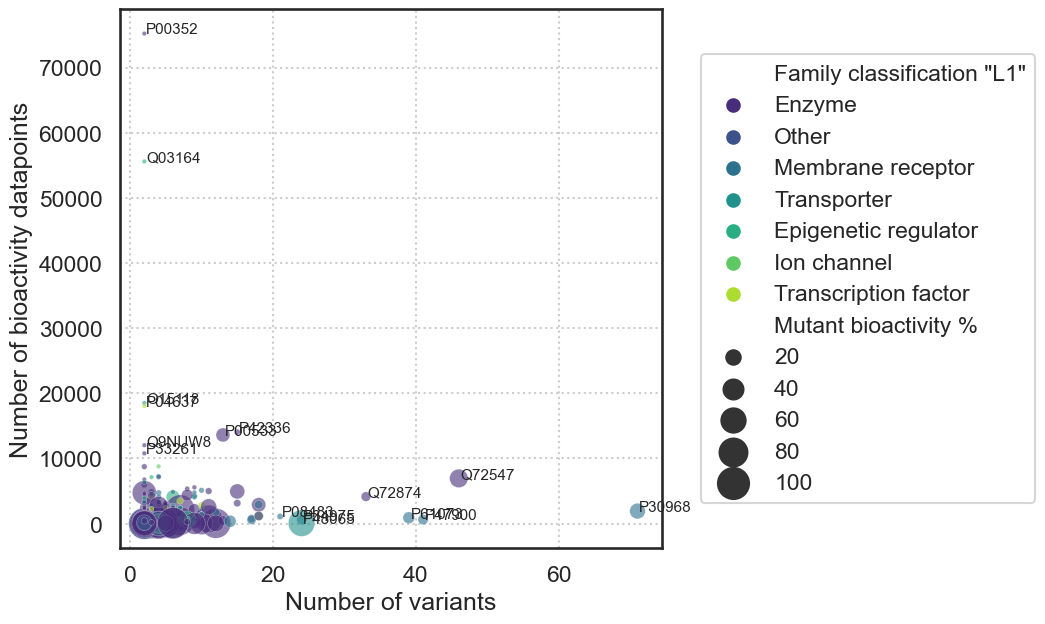

In [65]:
plot_stats_bubble(stats_protein,
                  filter_tag='',
                  hue_property='l1',
                  hue_title='Family classification "L1"',
                  label_condition='connectivity',
                  xy_lims=None,
                  output_dir=accession_analysis_dir,
                  save=True)

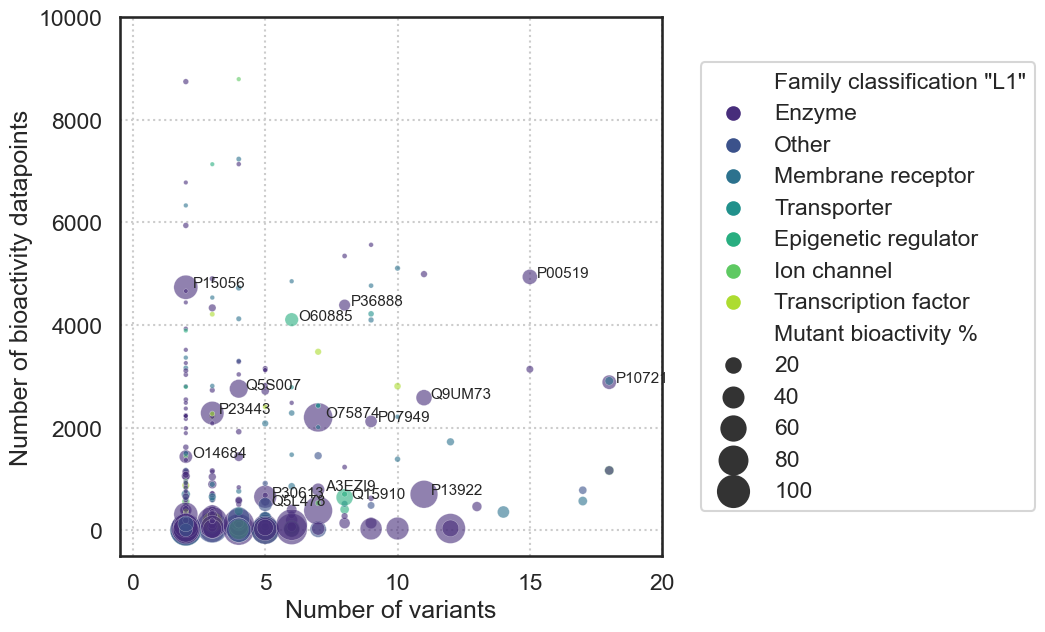

In [66]:
# Zoom into the most populated area
plot_stats_bubble(stats_protein,
                  filter_tag='',
                  hue_property='l1',
                  hue_title='Family classification "L1"',
                  label_condition='connectivity_mutant_percentage',
                  xy_lims=[(-0.5,20),(-500,10000)],
                  output_dir=accession_analysis_dir,
                  save=True)

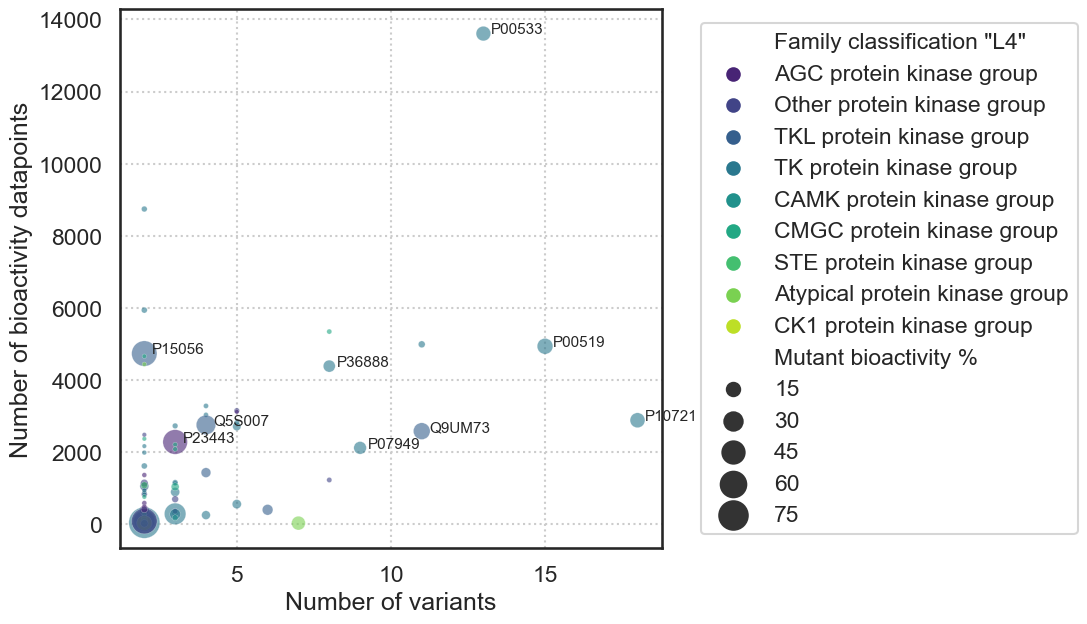

In [67]:
# Plot only kinases
plot_stats_bubble(stats_protein[stats_protein['l2'] == 'Kinase'],
                  filter_tag='L2Kinase',
                  hue_property='l4',
                  hue_title='Family classification "L4"',
                  label_condition='connectivity_mutant_percentage',
                  xy_lims=None,
                  output_dir=accession_analysis_dir,
                  save=True)

##### Plot main statistics in histograms
To explore the density of proteins regarding different properties

In [68]:
plot_stats_histograms(stats_protein, accession_analysis_dir, save=True)

<Figure size 640x480 with 0 Axes>

#### Calculate statistics per variant (target_id)

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the statistics table to see if some of the variants are undefined.

In [69]:
stats_variant = get_statistics_across_variants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                               annotation_round, accession_analysis_dir,save=False)
stats_variant

,accession,variant,connectivity_variant,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
0,A0A045ISB3,A0A045ISB3_F161S,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,2,61.250000
1,A0A045ISB3,A0A045ISB3_I203A,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,3,61.250000
2,A0A045ISB3,A0A045ISB3_I207A,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,5,61.250000
3,A0A045ISB3,A0A045ISB3_I207K,4,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,4,61.250000
4,A0A045ISB3,A0A045ISB3_WT,245,261,245.0,5,6.130268,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,93.869732,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Q9YQ12,Q9YQ12_V32I_L33F_I54M_V82I,2,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.171233,10,546.000000
1643,Q9YQ12,Q9YQ12_V32I_M46I_I47V_Q58E_I84V,11,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.941781,4,99.272727
1644,Q9YQ12,Q9YQ12_V82A,4,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.342466,5,273.000000
1645,Q9YQ12,Q9YQ12_V82F,3,1168,1092.0,18,6.506849,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily,Human immunodeficiency virus 1,NaN,0.256849,6,364.000000


##### Filter variants for accessions with mutant percentage over 10% and more than 1,000 bioactivity data

In [70]:
stats_variant_filtered = filter_statistics(stats_variant,
                                           min_data=1000,
                                           max_data=None,
                                           min_percentage=10,
                                           max_perccentage=None,
                                           min_variants=0,
                                           max_variants=None,
                                           sort_output_by='connectivity_mutant_percentage')
variants_filter_tag = 'C1000P10' # To identify in the upcoming plots that the stats were filtered
stats_variant_filtered

Accession codes for filtered accessions (14):
O75874, P15056, P23443, Q5S007, Q72547, Q9UM73, P30968, P00519, P10721, P00533, O60885, O14684, P07949, P36888
Gene names for filtered accessions:
IDH1, BRAF;B-Raf, RPS6KB1, LRRK2, N/A, ALK, GNRHR, ABL1, KIT, EGFR, BRD4, PTGES, RET, FLT3


,accession,variant,connectivity_variant,connectivity,connectivity_wt,target_id,connectivity_mutant_percentage,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
122,O75874,O75874_R132S,5,2202,304.0,7,86.194369,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.227066,7,295.000000
117,O75874,O75874_R132C,307,2202,304.0,7,86.194369,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,13.941871,2,4.804560
123,O75874,O75874_WT,304,2202,304.0,7,86.194369,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,13.805631,3,4.851974
121,O75874,O75874_R132L,11,2202,304.0,7,86.194369,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,0.499546,5,134.090909
120,O75874,O75874_R132H_R132C,94,2202,304.0,7,86.194369,Enzyme,Oxidoreductase,Other,Other,Other,Homo sapiens (Human),IDH1,4.268847,4,15.691489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,P36888,P36888_D835V,12,4389,3873.0,8,11.756664,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,0.273411,8,322.750000
857,P36888,P36888_D835Y,232,4389,3873.0,8,11.756664,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,5.285942,2,16.693966
858,P36888,P36888_F691L,38,4389,3873.0,8,11.756664,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,0.865801,7,101.921053
859,P36888,P36888_K663Q,52,4389,3873.0,8,11.756664,Enzyme,Kinase,Protein Kinase,TK protein kinase group,Tyrosine protein kinase PDGFR family,Homo sapiens (Human),FLT3,1.184780,5,74.480769


##### Plot amount of data in each variant for the filtered proteins

<b>NOTE:</b> Variants with undefined mutants (i.e. target_id = accession_MUTANT) are also included in this analysis.
Check the statistics table in the cell above to see if some of the variants are undefined.

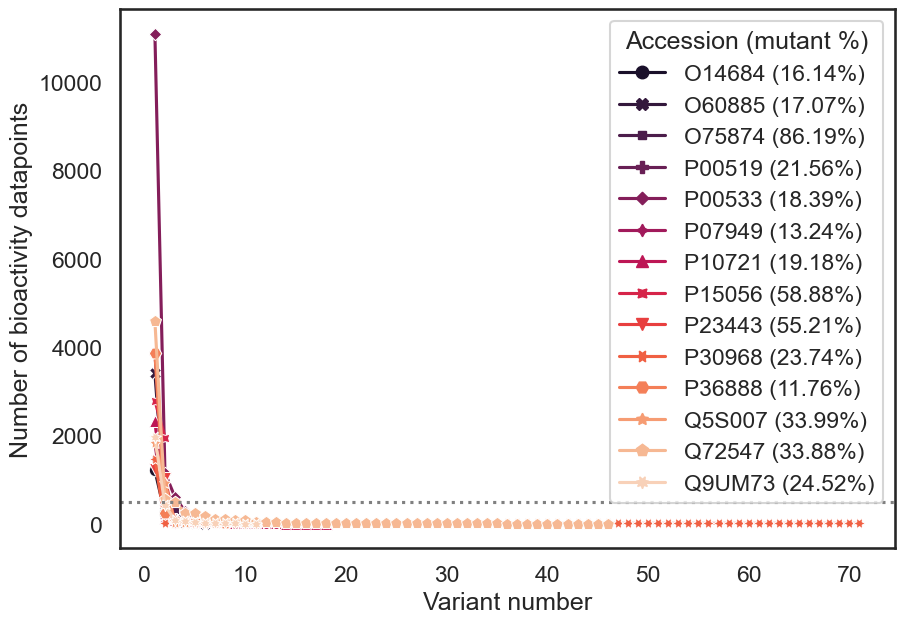

In [71]:
plot_variant_stats_lineplot(stats_variant_filtered,
                            filter_tag=variants_filter_tag,
                            y_column='connectivity_variant',
                            y_label='Number of bioactivity datapoints',
                            xy_lims=None,
                            output_dir=accession_analysis_dir,
                            save=True
                            )

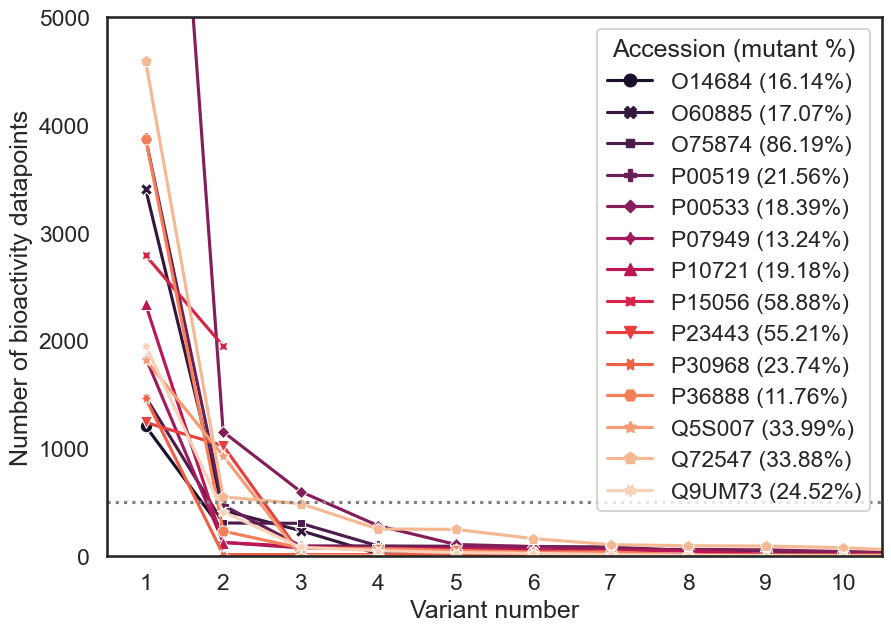

In [72]:
# Plot zooming in
plot_variant_stats_lineplot(stats_variant_filtered,
                            filter_tag=variants_filter_tag,
                            y_column='connectivity_variant',
                            y_label='Number of bioactivity datapoints',
                            xy_lims=[(0.5,10.5),(0,5000)],
                            output_dir=accession_analysis_dir,
                            save=True
                            )

##### Plot correlation between fold-change differences of first and second most populated variants and other variables

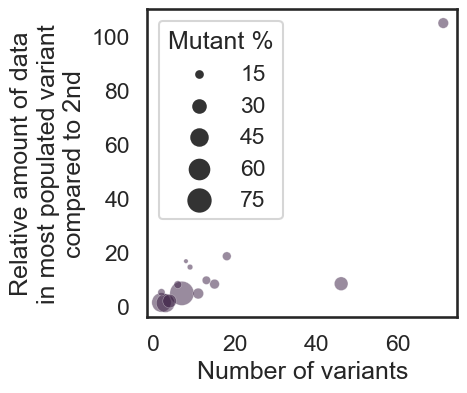

In [73]:
plot_variant_fold_change_stats(stats_variant_filtered,
                               filter_tag=variants_filter_tag,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity_mutant_percentage',
                               size_label='Mutant %',
                               color='#35193e',
                               output_dir=accession_analysis_dir,
                               save=True)

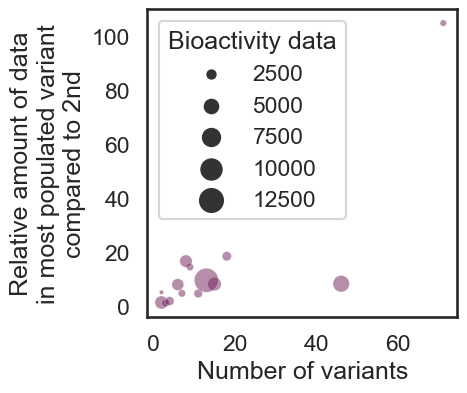

In [74]:
plot_variant_fold_change_stats(stats_variant_filtered,
                               filter_tag=variants_filter_tag,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity',
                               size_label='Bioactivity data',
                               color='#701f57',
                               output_dir=accession_analysis_dir,
                               save=True)

Check also with a less stringent filter (i.e. only coverage and not bioactivity data)

In [75]:
stats_variant_filtered_2 = filter_statistics(stats_variant,
                                           min_data=0,
                                             max_data=None,
                                           min_percentage=10,
                                             max_perccentage=None,
                                           min_variants=0,
                                             max_variants=None,
                                           sort_output_by='connectivity_mutant_percentage')
variants_filter_tag_2 = 'P10' # To identify in the upcoming plots that the stats were filtered

Accession codes for filtered accessions (95):
P48735, C1KIQ2, Q62120, O75874, P02511, P01116, P0DOF9, P56690, P13738, P13922, Q9NPD8, P48065, Q15022, P07753, Q9QUR6, D5F1R0, Q9P2K8, Q9NZN5, Q05320, P15056, Q6P988, P23443, Q5NGQ3, Q81R22, P21146, P30613, P36873, Q86WV6, P11678, P15682, Q55664, P21860, P41182, Q10471, Q9EPK8, P00520, P40313, Q9KM66, Q5S007, Q72547, Q8II92, P97714, Q869C3, P04578, P96830, Q15910, Q8NY00, P0A031, Q9UM07, A2RI47, P29994, P9WPP1, P17865, Q9UM73, Q9UHC9, P35520, P30968, Q9H7B4, P00519, P43249, P15038, P05981, P51149, P10721, Q06486, Q61616, P00533, Q5L478, P04585, O60885, P54098, Q9UGC6, Q7KQK5, Q58F21, P0DOF8, P42346, O14684, P9WPP9, Q96HE7, A3EZI9, P49842, P0A749, P07949, P41231, Q13526, P11086, P18090, P61073, A4TVL0, P36888, O60218, O95069, P03420, Q04828, P55859
Gene names for filtered accessions:
N/A, N/A, N/A, IDH1, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, N/A, EIF2AK4, N/A, N/A, BRAF;B-Raf, N/A, RPS6KB1, N/A, N/A, N/A, PKLR, N/A, N/A, N/

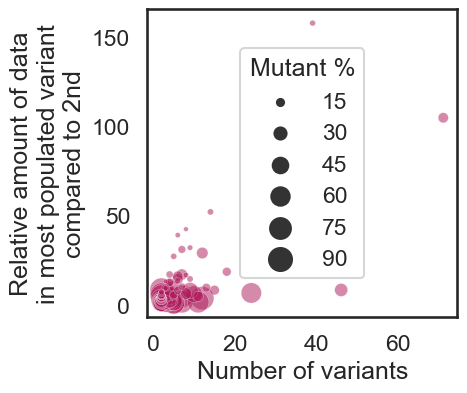

In [76]:
plot_variant_fold_change_stats(stats_variant_filtered_2,
                               filter_tag=variants_filter_tag_2,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity_mutant_percentage',
                               size_label='Mutant %',
                               color='#ad1759',
                               output_dir=accession_analysis_dir,
                               save=True)

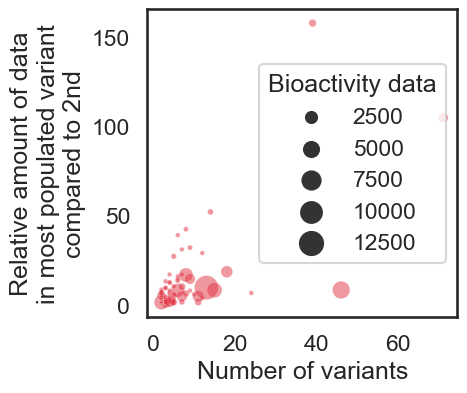

In [77]:
plot_variant_fold_change_stats(stats_variant_filtered_2,
                               filter_tag=variants_filter_tag_2,
                               variant_n=2,
                               x_column='target_id',
                               x_label='Number of variants',
                               size_column='connectivity',
                               size_label='Bioactivity data',
                               color='#e13342',
                               output_dir=accession_analysis_dir,
                               save=True)